In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
import ModelsPlotDisplay_CHN as model_plot

In [2]:
whole_data = pd.read_csv('CHN_sample_data.csv')

Xtodrop = ['stkcd','Dates','y']##训练中需要删掉的无用数据列
Xtodrop_add = []
Xtodrop = Xtodrop + Xtodrop_add

R2:  0.011858953523535276
MSFE:  0.023516536017490743
201701


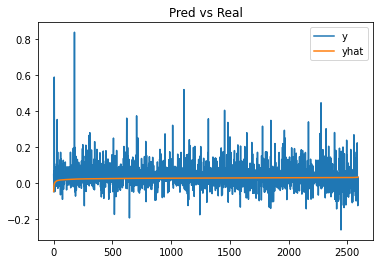

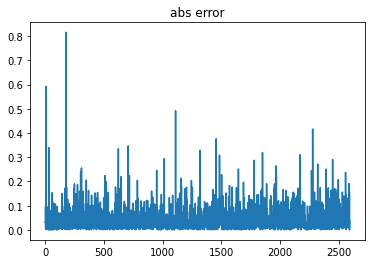

201208


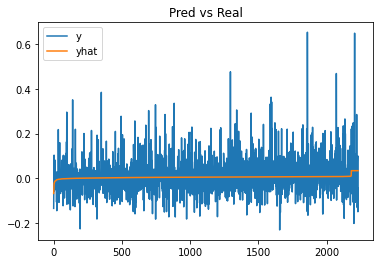

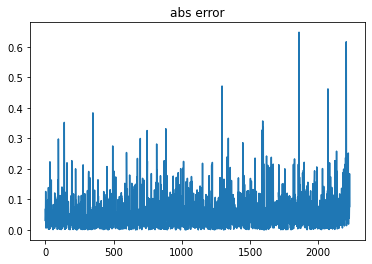

201301


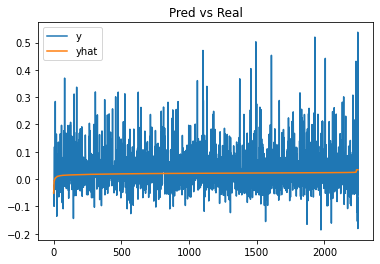

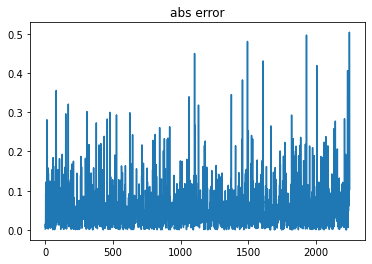

201209


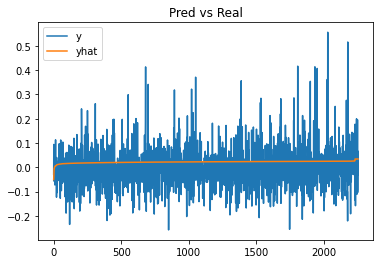

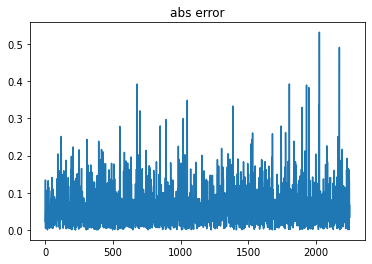

201808


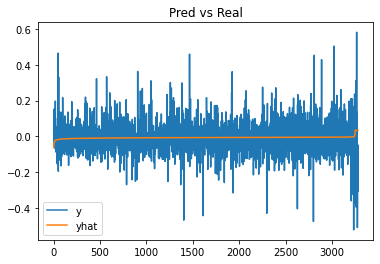

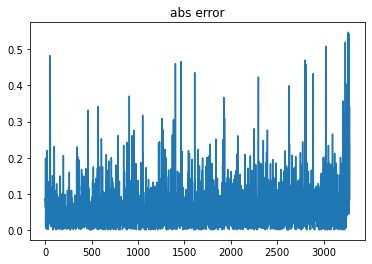

201105


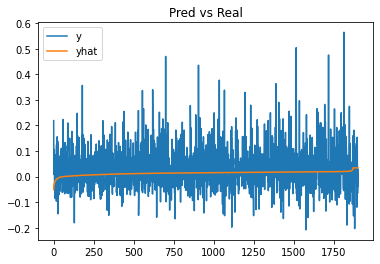

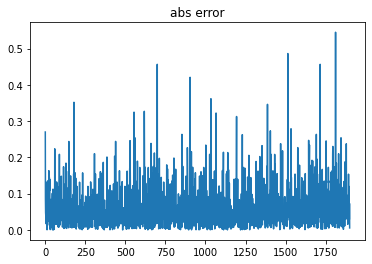

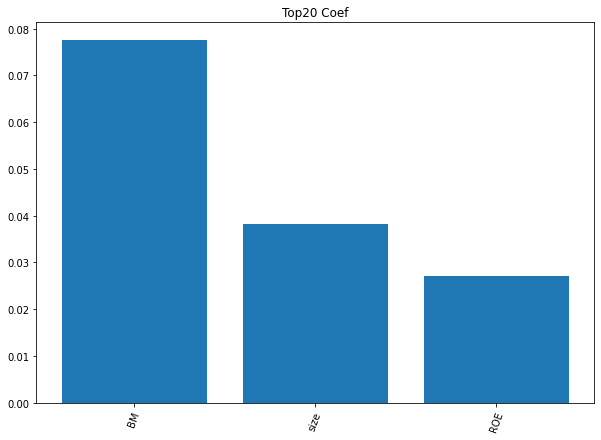

In [14]:
in_sample_result = model_plot.OLS(whole_data[['BM','size','ROE']],
                                  whole_data['y'],
                                  whole_data[['BM','size','ROE']],
                                  whole_data)
# deal with ols insample monthly
all_pred = in_sample_result[0]
all_coef = in_sample_result[-1]
msfe_monthly = all_pred.groupby('Dates').apply(lambda x: np.sum((x['yhat']-x['y'])**2) / len(x) )

# all_pred = all_pred.groupby('Dates').apply(lambda x: x.mean()[['y','yhat']])

r2 = 1-np.sum((all_pred['yhat']-all_pred['y'])**2)/np.sum(all_pred['y']**2)
print('R2: ', r2)
msfe = np.sum((all_pred['yhat']-all_pred['y'])**2) / len(all_pred)
print('MSFE: ', msfe)

# all_pred.index = [datetime.datetime(year = int(x//100),month = int(x%100),day = 28) for x in all_pred.index]
all_coef = pd.DataFrame(all_coef)

head_mse = msfe_monthly.sort_values().head(6)
head_month = list(head_mse.index)
for m in head_month:
        print(m)
        m_pred = all_pred[all_pred['Dates'] == m]
        m_pred = m_pred.sort_values('yhat')
        m_pred['y'].reset_index(drop = True).plot()
        m_pred['yhat'].reset_index(drop = True).plot(title = 'Pred vs Real')
        plt.legend()
        plt.show()    
        abs(m_pred['y'] -m_pred['yhat']).reset_index(drop = True).plot(title = 'abs error')
        plt.show()

plt.figure(figsize = (10,7))
abs_coef = abs(all_coef[0])
toplot_coef = abs_coef.sort_values(ascending = False).head(20)
plt.bar(x = list(toplot_coef.index), height = toplot_coef.values)
plt.xticks(rotation=70)
plt.title('Top20 Coef')
plt.show()

In [13]:
all_pred

,Dates,stkcd,y,yhat,model
0,201001,2,0.009636,0.007685,ols
1,201001,5,0.037106,0.014344,ols
2,201001,6,0.042169,0.011786,ols
3,201001,9,0.084372,0.012235,ols
4,201001,11,0.026721,0.011887,ols
...,...,...,...,...,...
285278,201911,603992,0.004493,-0.011079,ols
285279,201911,603993,0.224719,-0.007089,ols
285280,201911,603997,0.029299,-0.006717,ols
285281,201911,603998,0.090670,-0.004379,ols


In [3]:
def Norm(in_df,no_Norm):
    op_df = in_df.copy()
    for col in op_df.columns:
        if col in no_Norm:
            continue
        else:
            col_max = max(op_df[col])
            col_min = min(op_df[col])
            op_df[col] = (op_df[col] - col_min) / (col_max - col_min)
    return op_df

In [18]:
all_month_list = list(whole_data['Dates'].drop_duplicates().values)
train_month_n = 24
test_month_n = 12
oos_month_n = 1
ols_op = []
ols_op_3factor = []


for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        train_monthes = all_month_list[i-test_month_n-train_month_n:i-test_month_n]
        test_monthes = all_month_list[i-test_month_n:i]
        oos_month = all_month_list[i]
        print(oos_month)
        
        train_data = whole_data[whole_data['Dates'].apply(lambda x: True if x in train_monthes else False)]
        test_data = whole_data[whole_data['Dates'].apply(lambda x: True if x in test_monthes else False)]
        oos_data = whole_data[whole_data['Dates'] == oos_month]
    
        X_train = train_data.drop(columns = Xtodrop)
        y_train = train_data['y']
        
        X_test = test_data.drop(columns = Xtodrop)
        y_test = test_data['y']
        
        X_oos = oos_data.drop(columns = Xtodrop)
        y_oos = oos_data['y']
        
        to_Norm = pd.concat([train_data,test_data,oos_data])
        normed_data = Norm(to_Norm,Xtodrop)
        train_data_normed = normed_data[normed_data['Dates'].apply(lambda x: True if x in train_monthes else False)]
        test_data_normed = normed_data[normed_data['Dates'].apply(lambda x: True if x in test_monthes else False)]
        oos_data_normed = normed_data[normed_data['Dates'] == oos_month]
        
        X_train_normed = train_data_normed.drop(columns = Xtodrop)
        y_train = train_data['y']
        
        X_test_normed = test_data_normed.drop(columns = Xtodrop)
        y_test = test_data['y']
        
        X_oos_normed = oos_data_normed.drop(columns = Xtodrop)
        y_oos = oos_data['y']
        
        ols_result = model_plot.OLS(X_train,y_train,X_oos,oos_data)
        ols_op_3 = model_plot.OLS(X_train[['BM','size','ROE']],y_train,X_oos[['BM','size','ROE']],oos_data)

        


        
        ols_op.append(ols_result)
        ols_op_3factor.append(ols_op_3)

        

201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911


MSFE:  0.05838800178528057
R2:  -1.1876024032535408


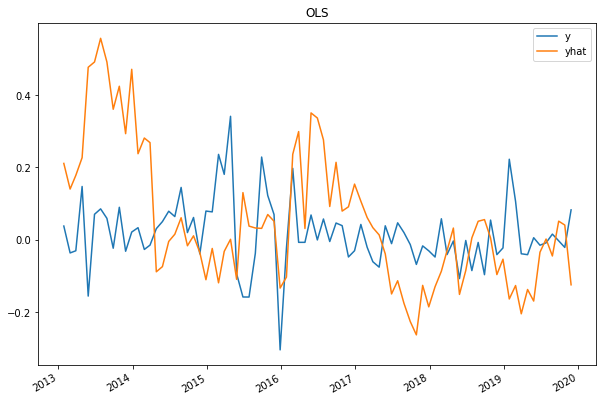

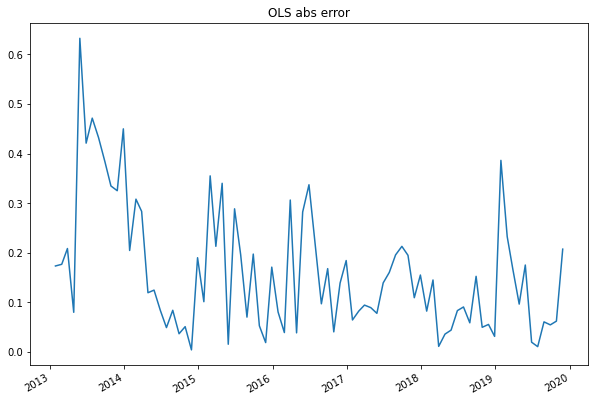

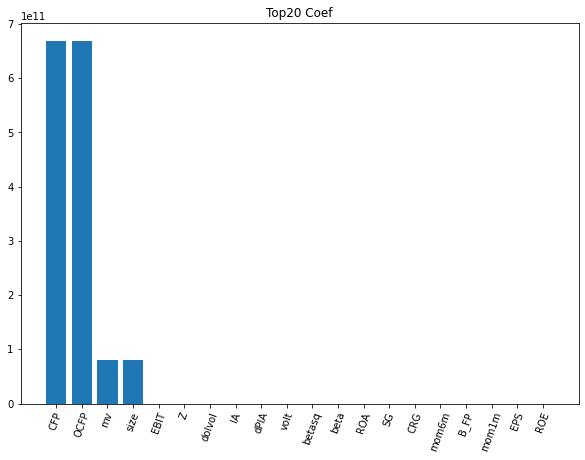

201907


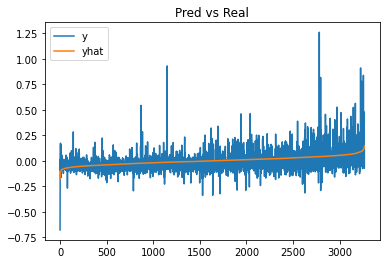

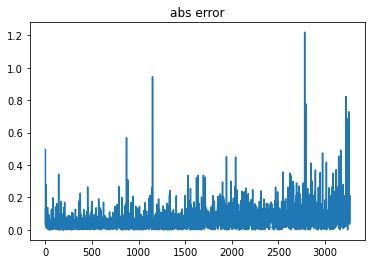

201701


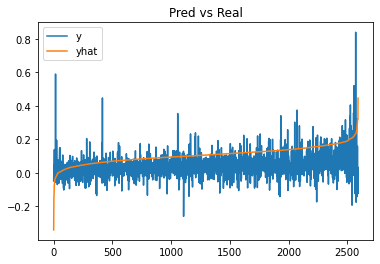

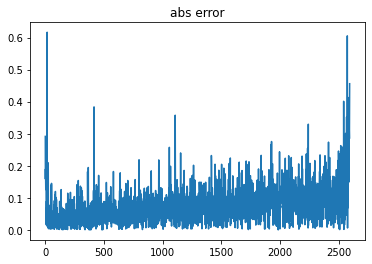

201906


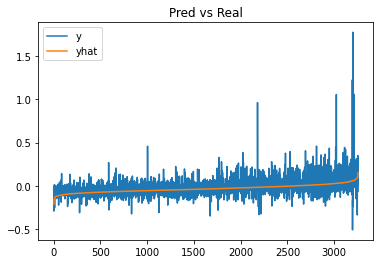

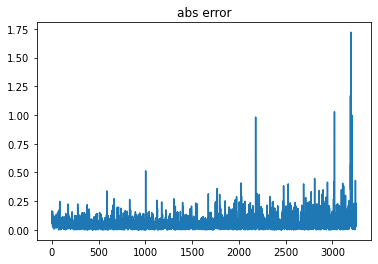

201812


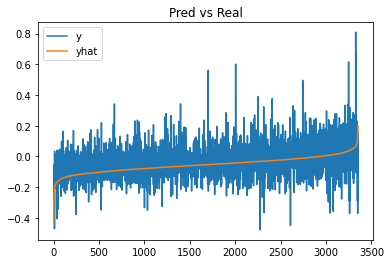

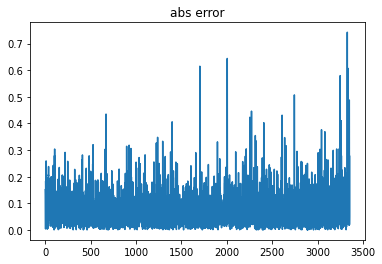

201803


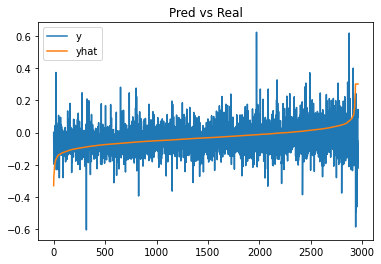

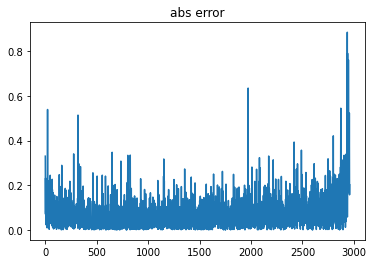

201910


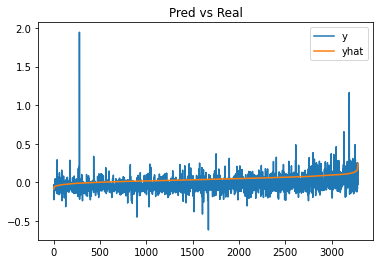

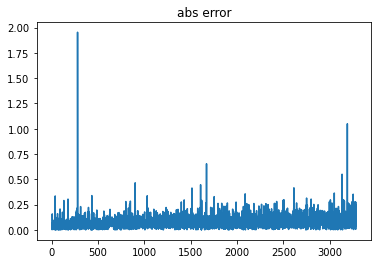

In [19]:
# deal with ols
all_pred = []
all_coef = []
for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        result_idx = i - (train_month_n + test_month_n + oos_month_n - 1)
        temp_result = ols_op[result_idx][0]
        temp_coef = ols_op[result_idx][1]
        all_pred.append(temp_result)
        all_coef.append(temp_coef)



all_pred = pd.concat(all_pred)
pred_toplot = all_pred.copy()

msfe = np.sum((all_pred['yhat']-all_pred['y'])**2) / len(all_pred)
print('MSFE: ', msfe)
r2 = 1-np.sum((all_pred['yhat']-all_pred['y'])**2)/np.sum(all_pred['y']**2)
print('R2: ', r2)

msfe_monthly = all_pred.groupby('Dates').apply(lambda x: np.sum((x['yhat']-x['y'])**2) / len(x) )
r2_monthly = all_pred.groupby('Dates').apply(lambda x: 1-np.sum((x['yhat']-x['y'])**2)/np.sum(x['y']**2))
abs_err_monthly = all_pred.groupby('Dates').apply(lambda x: abs(x['yhat']-x['y']) / len(x) )

all_pred = all_pred.groupby('Dates').apply(lambda x: x.mean()[['y','yhat']])
all_pred.index = [datetime.datetime(year = int(x//100),month = int(x%100),day = 28) for x in all_pred.index]
all_coef = pd.DataFrame(all_coef)



all_pred[['y','yhat']].plot(figsize = (10,7),title = 'OLS')
plt.show()


abs(all_pred['y']- all_pred['yhat']).plot(figsize = (10,7),title = 'OLS abs error')
plt.show()

plt.figure(figsize = (10,7))
abs_coef = abs(all_coef).mean()
toplot_coef = abs_coef.sort_values(ascending = False).head(20)
plt.bar(x = list(toplot_coef.index), height = toplot_coef.values)
plt.xticks(rotation=70)
plt.title('Top20 Coef')
plt.show()


head_mse = msfe_monthly.sort_values().head(6)
head_month = list(head_mse.index)


for m in head_month:
    print(m)
    m_pred = pred_toplot[pred_toplot['Dates'] == m]
    m_pred = m_pred.sort_values('yhat')
    m_pred['y'].reset_index(drop = True).plot()
    m_pred['yhat'].reset_index(drop = True).plot(title = 'Pred vs Real')
    plt.legend()
    plt.show()    
    abs(m_pred['y'] -m_pred['yhat']).reset_index(drop = True).plot(title = 'abs error')
    
    
    plt.show()

MSFE:  0.028532971705655493
R2:  -0.06903465723659719


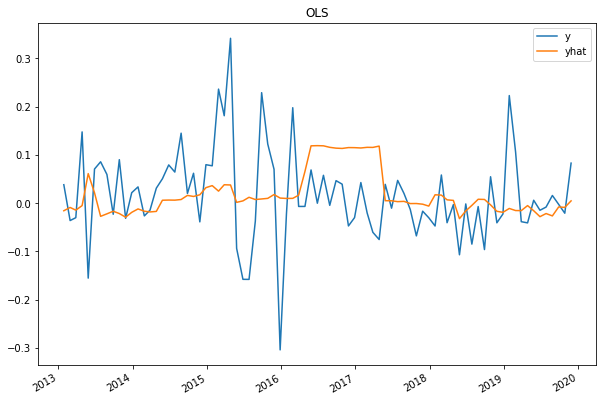

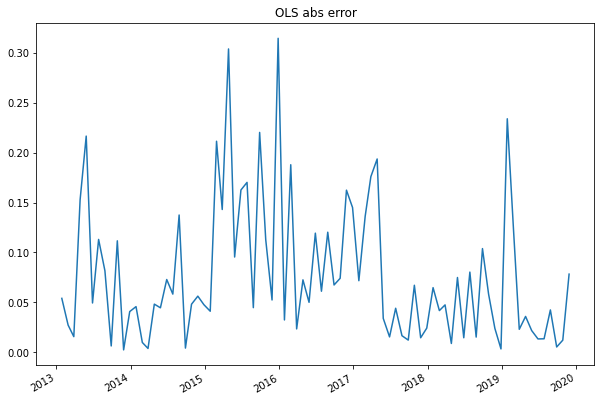

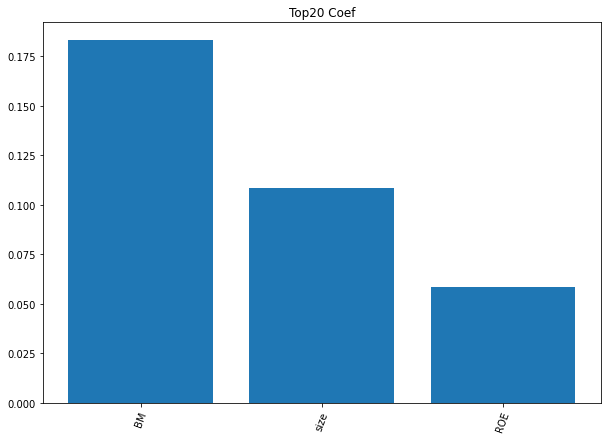

201808


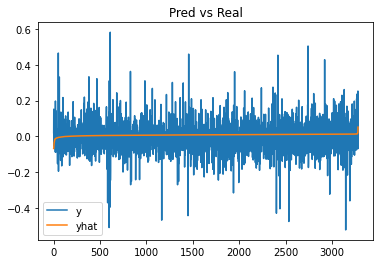

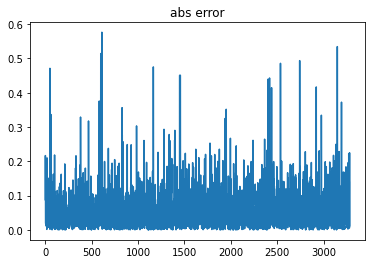

201303


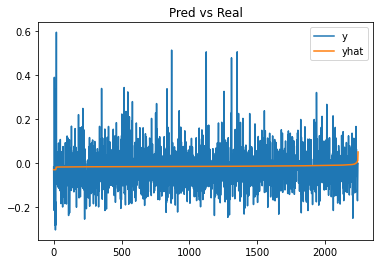

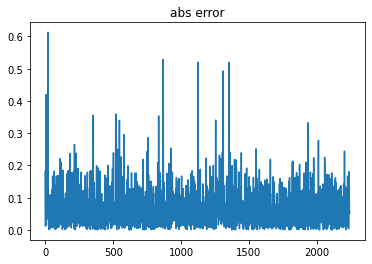

201711


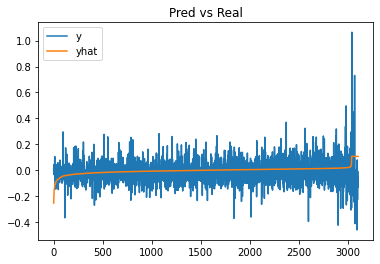

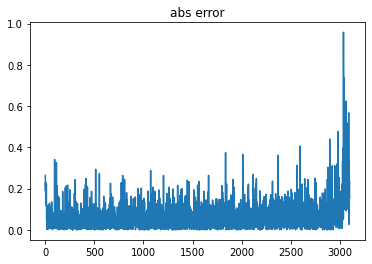

201905


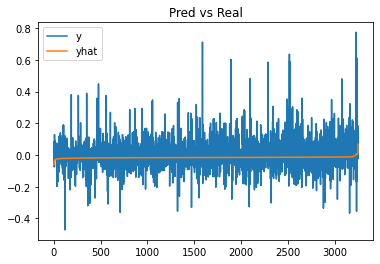

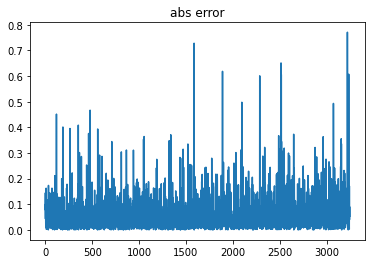

201311


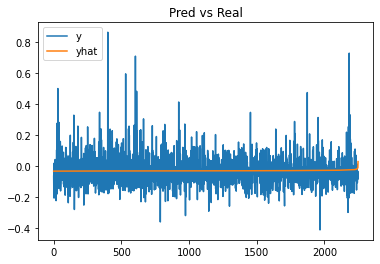

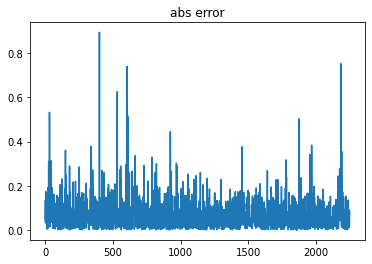

201403


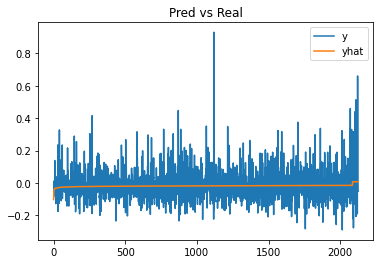

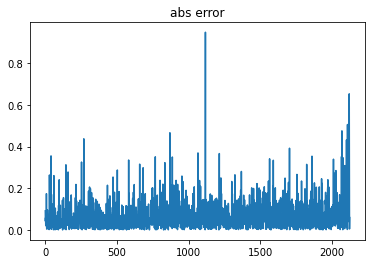

In [20]:
# deal with ols
all_pred = []
all_coef = []
for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        result_idx = i - (train_month_n + test_month_n + oos_month_n - 1)
        temp_result = ols_op_3factor[result_idx][0]
        temp_coef = ols_op_3factor[result_idx][1]
        all_pred.append(temp_result)
        all_coef.append(temp_coef)



all_pred = pd.concat(all_pred)
pred_toplot = all_pred.copy()

msfe = np.sum((all_pred['yhat']-all_pred['y'])**2) / len(all_pred)
print('MSFE: ', msfe)
r2 = 1-np.sum((all_pred['yhat']-all_pred['y'])**2)/np.sum(all_pred['y']**2)
print('R2: ', r2)

msfe_monthly = all_pred.groupby('Dates').apply(lambda x: np.sum((x['yhat']-x['y'])**2) / len(x) )
r2_monthly = all_pred.groupby('Dates').apply(lambda x: 1-np.sum((x['yhat']-x['y'])**2)/np.sum(x['y']**2))
abs_err_monthly = all_pred.groupby('Dates').apply(lambda x: abs(x['yhat']-x['y']) / len(x) )

all_pred = all_pred.groupby('Dates').apply(lambda x: x.mean()[['y','yhat']])
all_pred.index = [datetime.datetime(year = int(x//100),month = int(x%100),day = 28) for x in all_pred.index]
all_coef = pd.DataFrame(all_coef)



all_pred[['y','yhat']].plot(figsize = (10,7),title = 'OLS')
plt.show()


abs(all_pred['y']- all_pred['yhat']).plot(figsize = (10,7),title = 'OLS abs error')
plt.show()

plt.figure(figsize = (10,7))
abs_coef = abs(all_coef).mean()
toplot_coef = abs_coef.sort_values(ascending = False).head(20)
plt.bar(x = list(toplot_coef.index), height = toplot_coef.values)
plt.xticks(rotation=70)
plt.title('Top20 Coef')
plt.show()


head_mse = msfe_monthly.sort_values().head(6)
head_month = list(head_mse.index)


for m in head_month:
    print(m)
    m_pred = pred_toplot[pred_toplot['Dates'] == m]
    m_pred = m_pred.sort_values('yhat')
    m_pred['y'].reset_index(drop = True).plot()
    m_pred['yhat'].reset_index(drop = True).plot(title = 'Pred vs Real')
    plt.legend()
    plt.show()    
    abs(m_pred['y'] -m_pred['yhat']).reset_index(drop = True).plot(title = 'abs error')
    
    
    plt.show()